In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting tool
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
warnings.filterwarnings('ignore')

data = pd.read_csv('Medical Speech, Transcription, and Intent\overview-of-recordings.csv')

In [3]:
data.head(4)

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,43453425,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,21665495
1,light_clipping,0.6803,no_noise,0.6803,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,44088126
2,no_clipping,1.0000,no_noise,0.6655,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_53187202.wav,there is too much pain when i move my arm,Heart hurts,44292353
3,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,31349958,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_31349958_55816195.wav,My son had his lip pierced and it is swollen a...,Infected wound,43755034


In [4]:
data['prompt'].unique()

array(['Emotional pain', 'Hair falling out', 'Heart hurts',
       'Infected wound', 'Foot ache', 'Shoulder pain',
       'Injury from sports', 'Skin issue', 'Stomach ache', 'Knee pain',
       'Joint pain', 'Hard to breath', 'Head ache', 'Body feels weak',
       'Feeling dizzy', 'Back pain', 'Open wound', 'Internal pain',
       'Blurry vision', 'Acne', 'Muscle pain', 'Neck pain', 'Cough',
       'Ear ache', 'Feeling cold'], dtype=object)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6661 entries, 0 to 6660
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   audio_clipping                       6661 non-null   object 
 1   audio_clipping:confidence            6661 non-null   float64
 2   background_noise_audible             6661 non-null   object 
 3   background_noise_audible:confidence  6661 non-null   float64
 4   overall_quality_of_the_audio         6661 non-null   float64
 5   quiet_speaker                        6661 non-null   object 
 6   quiet_speaker:confidence             6661 non-null   float64
 7   speaker_id                           6661 non-null   int64  
 8   file_download                        6661 non-null   object 
 9   file_name                            6661 non-null   object 
 10  phrase                               6661 non-null   object 
 11  prompt                        

| 📄 **Field** | 📖 **Description** |
|----------------|---------------------|
| `audio_clipping` | Indicates if any part of the audio exhibits clipping, which might suggest distortion or overly high input volume. |
| `audio_clipping:confidence` | Reflects the confidence level regarding the detection of audio clipping. |
| `background_noise_audible` | Denotes the presence of background noise within the recording. |
| `background_noise_audible:confidence` | Represents how confident the assessment is regarding background noise presence. |
| `overall_quality_of_the_audio` | Provides a numerical score denoting the perceived overall quality of the audio. |
| `quiet_speaker` | Identifies whether the recording's speaker volume is considered low. |
| `quiet_speaker:confidence` | Indicates the confidence level concerning the speaker's volume assessment. |
| `speaker_id` | A unique identifier for the person providing the utterance. |
| `file_download` | A URL from which the corresponding audio file can be downloaded. |
| `file_name` | The name of the audio file, linking the data entry to the specific audio content. |
| `phrase` | The transcribed text of what is spoken in the audio file. |
| `prompt` | The context or topic that the spoken phrase is meant to address. |
| `writer_id` | A unique identifier for the individual who crafted the phrase or prompt. |

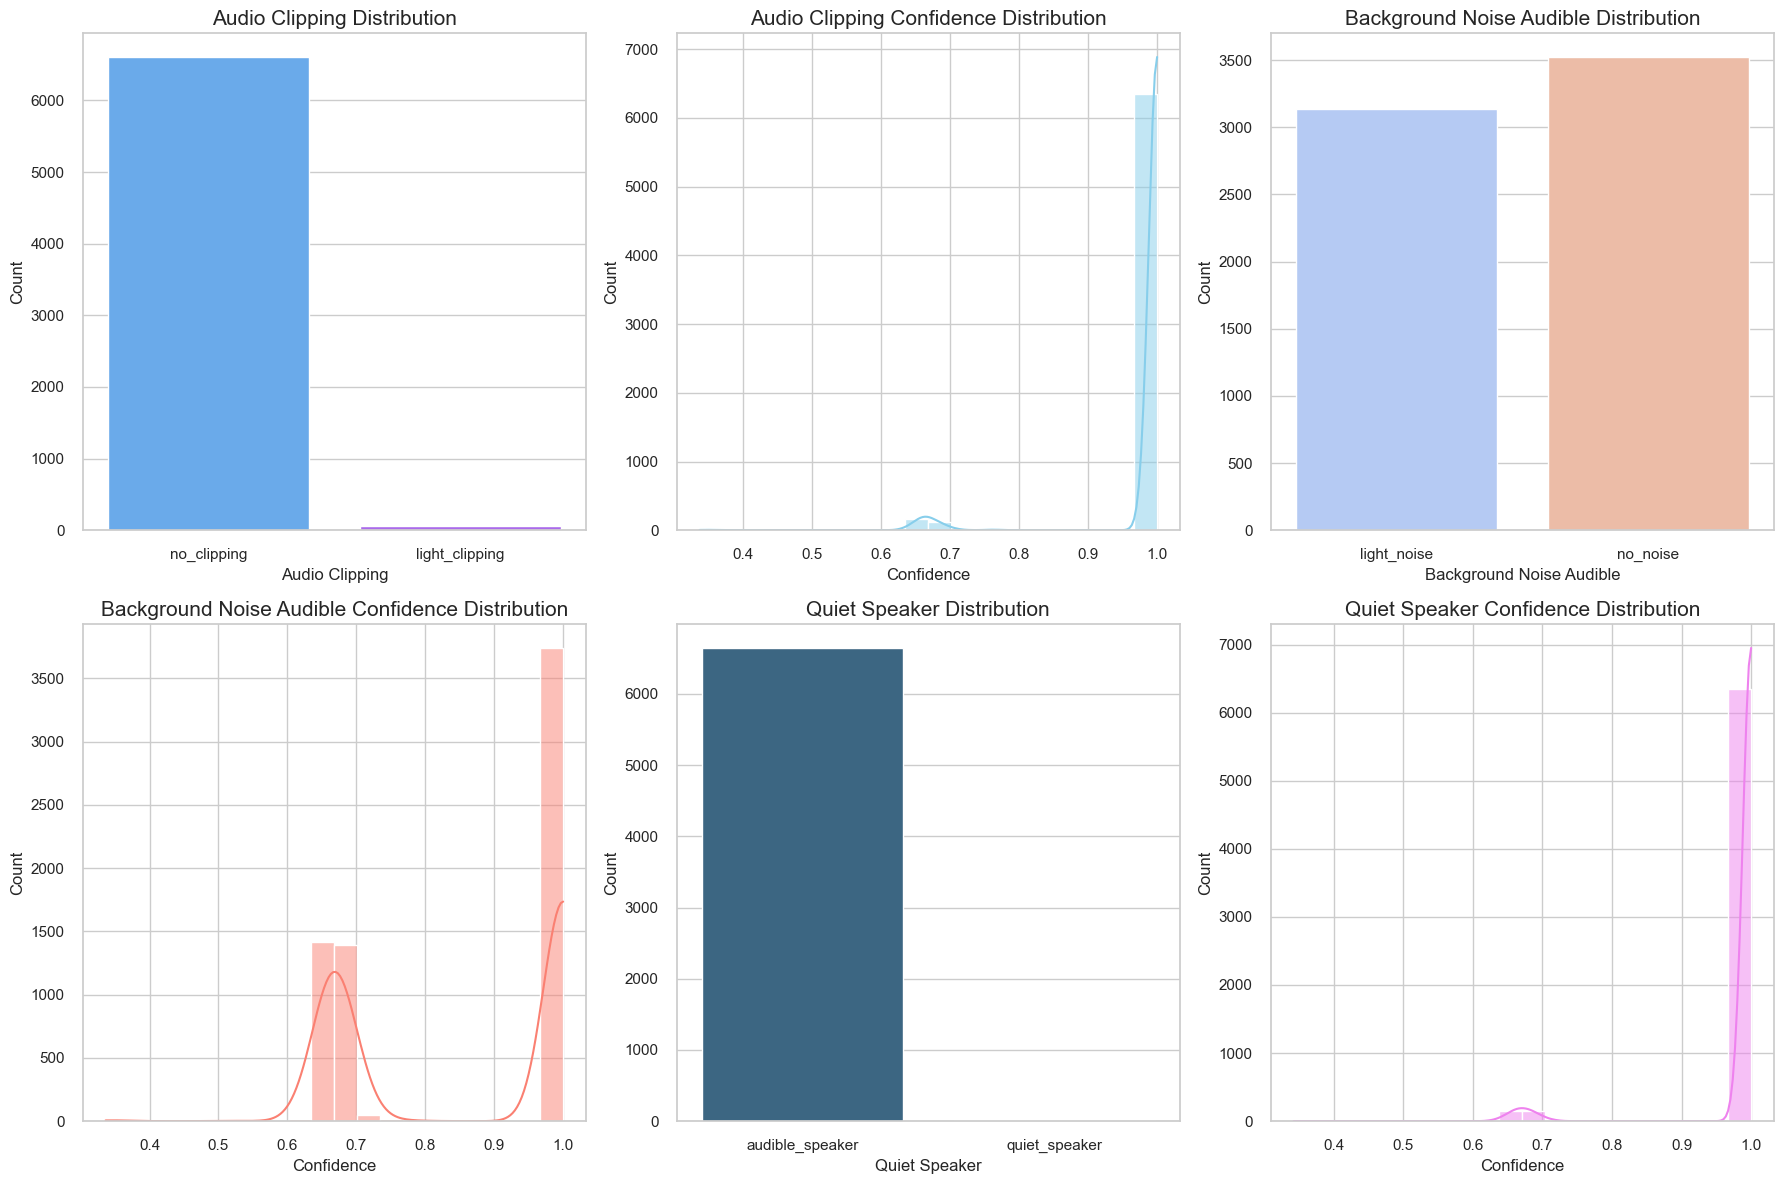

In [62]:
# Set a more appealing style and color palette
sns.set(style="whitegrid", palette="pastel")

# Initialize the figure
plt.figure(figsize=(18, 12))

# Audio Clipping Distribution
plt.subplot(2, 3, 1)
sns.countplot(data=data, x='audio_clipping', palette='cool')
plt.title('Audio Clipping Distribution', fontsize=15)
plt.xlabel('Audio Clipping', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Audio Clipping Confidence Distribution
plt.subplot(2, 3, 2)
sns.histplot(data=data, x='audio_clipping:confidence', bins=20, color='skyblue', kde=True)
plt.title('Audio Clipping Confidence Distribution', fontsize=15)
plt.xlabel('Confidence', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Background Noise Audible Distribution
plt.subplot(2, 3, 3)
sns.countplot(data=data, x='background_noise_audible', palette='coolwarm')
plt.title('Background Noise Audible Distribution', fontsize=15)
plt.xlabel('Background Noise Audible', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Background Noise Audible Confidence Distribution
plt.subplot(2, 3, 4)
sns.histplot(data=data, x='background_noise_audible:confidence', bins=20, color='salmon', kde=True)
plt.title('Background Noise Audible Confidence Distribution', fontsize=15)
plt.xlabel('Confidence', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Quiet Speaker Distribution
plt.subplot(2, 3, 5)
sns.countplot(data=data, x='quiet_speaker', palette='viridis')
plt.title('Quiet Speaker Distribution', fontsize=15)
plt.xlabel('Quiet Speaker', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Quiet Speaker Confidence Distribution
plt.subplot(2, 3, 6)
sns.histplot(data=data, x='quiet_speaker:confidence', bins=20, color='violet', kde=True)
plt.title('Quiet Speaker Confidence Distribution', fontsize=15)
plt.xlabel('Confidence', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


In [63]:
# Apply one-hot encoding to the specified categorical columns
data = pd.get_dummies(data, columns=['audio_clipping', 'background_noise_audible', 'quiet_speaker'], drop_first=True)

In [65]:
# Select only the relevant columns for clustering
features = data[['audio_clipping:confidence', 
                 'background_noise_audible:confidence', 
                 'overall_quality_of_the_audio', 
                 'quiet_speaker:confidence',
                 'audio_clipping_no_clipping',	
                 'background_noise_audible_no_noise',	
                 'quiet_speaker_quiet_speaker']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

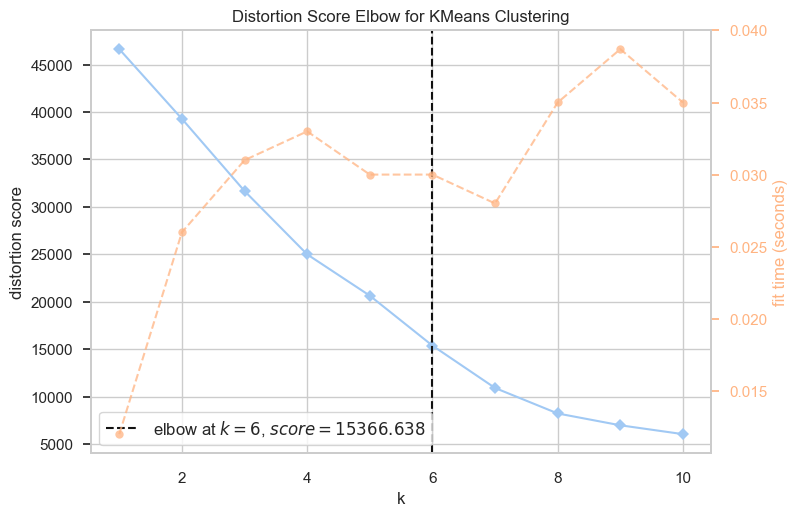

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(scaled_features)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

In [67]:
# Apply K-means clustering 
kmeans = KMeans(n_clusters=4) 
km_labels = kmeans.fit_predict(scaled_features)

# Apply MeanShift clustering
ms = MeanShift()
ms_labels = ms.fit_predict(scaled_features)

In [68]:
# Apply PCA to reduce the data to three dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

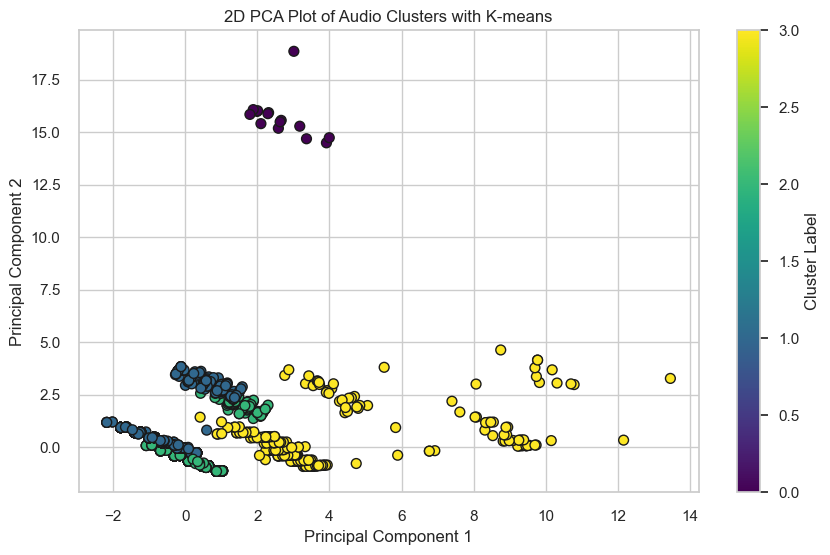

In [69]:
# Create a scatter plot of the reduced data
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=km_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('2D PCA Plot of Audio Clusters with K-means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

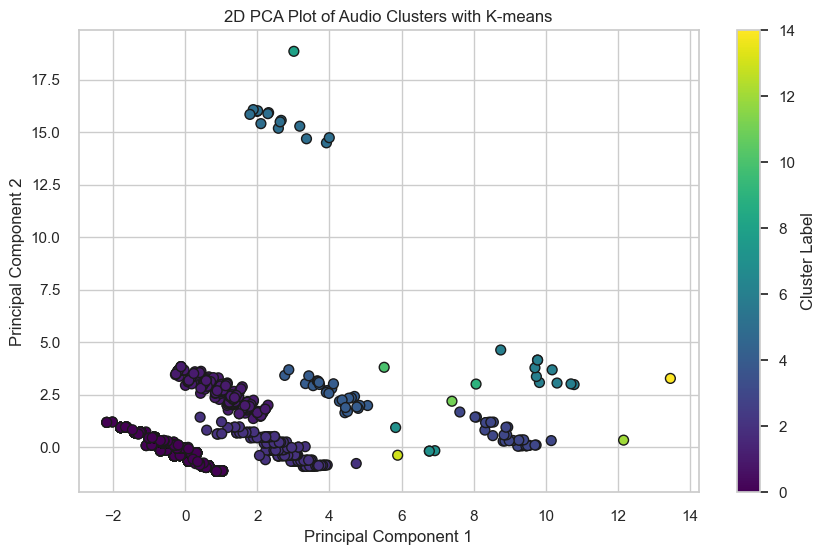

In [70]:
# Create a scatter plot of the reduced data
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=ms_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('2D PCA Plot of Audio Clusters with K-means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [71]:
# Calculate silhouette scores
kmeans_silhouette = silhouette_score(scaled_features, km_labels)
meanshift_silhouette = silhouette_score(scaled_features, ms_labels)

print(f"K-means silhouette score: {kmeans_silhouette}")
print(f"Mean Shift silhouette score: {meanshift_silhouette}")

K-means silhouette score: 0.3494652835816805
Mean Shift silhouette score: 0.5693551056593406


In [72]:
# Dictionary to store silhouette scores
silhouette_scores = {}

# Agglomerative Hierarchical Clustering
agglomerative = AgglomerativeClustering(n_clusters=4)  # Adjust n_clusters based on your dataset
agglomerative_labels = agglomerative.fit_predict(scaled_features)
silhouette_scores['Agglomerative'] = silhouette_score(scaled_features, agglomerative_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on your dataset
dbscan_labels = dbscan.fit_predict(scaled_features)
# Only calculate score if more than one cluster is found
if len(set(dbscan_labels)) > 1:
    silhouette_scores['DBSCAN'] = silhouette_score(scaled_features, dbscan_labels)

# Spectral Clustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors')  # Adjust n_clusters
spectral_labels = spectral.fit_predict(scaled_features)
silhouette_scores['Spectral'] = silhouette_score(scaled_features, spectral_labels)

# Gaussian Mixture Models
gmm = GaussianMixture(n_components=4)  # Adjust n_components based on your dataset
gmm_labels = gmm.fit_predict(scaled_features)
silhouette_scores['GMM'] = silhouette_score(scaled_features, gmm_labels)

# Find the best scoring method
best_method = max(silhouette_scores, key=silhouette_scores.get)
best_score = silhouette_scores[best_method]

print(f"Best Clustering Method: {best_method} with a Silhouette Score of: {best_score}")
print("\nAll scores:", silhouette_scores)


Best Clustering Method: DBSCAN with a Silhouette Score of: 0.7034791392974515

All scores: {'Agglomerative': 0.306640598258514, 'DBSCAN': 0.7034791392974515, 'Spectral': 0.002092825072593747, 'GMM': 0.3470679814301673}


In [73]:
# Parameters range definition
min_samples_range = range(2, 11)  # You can adjust this range based on your dataset
eps_values = {}  # To store recommended eps values for each min_samples

# Determine eps values using NearestNeighbors for each min_samples
for min_samples in min_samples_range:
    neighbors = NearestNeighbors(n_neighbors=min_samples).fit(scaled_features)
    distances, _ = neighbors.kneighbors(scaled_features)
    distances = np.sort(distances[:, min_samples - 1], axis=0)
    eps_values[min_samples] = np.mean(distances)  # Average distance can be a starting point

# Clustering and silhouette score evaluation
best_score = -1
best_params = {'eps': None, 'min_samples': None}

for min_samples, eps_guess in eps_values.items():
    for eps in np.linspace(eps_guess * 0.5, eps_guess * 1.5, num=5):  # Explore around the guess
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_features)
        
        # Compute silhouette score only if more than one cluster is detected (excluding noise)
        if len(set(labels)) > 1:
            score = silhouette_score(scaled_features, labels)
            if score > best_score:
                best_score = score
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

print(f"Best Parameters: {best_params} with Silhouette Score: {best_score}")


Best Parameters: {'eps': 0.07964209681799403, 'min_samples': 6} with Silhouette Score: 0.8374733610725207


In [77]:
# Apply DBSCAN clustering with the optimized parameters
dbscan_optimized = DBSCAN(eps=0.07964209681799403, min_samples=6)
labels_optimized = dbscan_optimized.fit_predict(scaled_features)

# Append the optimized DBSCAN cluster labels to your original dataframe
data['dbscan_optimized_cluster'] = labels_optimized

# Now, you can analyze the clustering result, check the distribution of cluster labels, etc.
print(f"Number of clusters (including noise): {len(set(labels_optimized)) - (1 if -1 in labels_optimized else 0)}")
print(f"Number of noise points: {list(labels_optimized).count(-1)}")

Number of clusters (including noise): 36
Number of noise points: 470


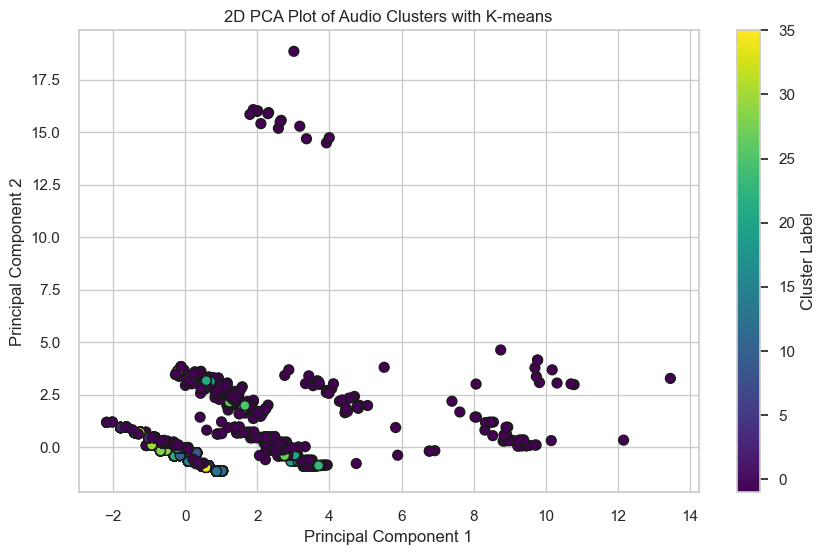

In [78]:
# Reduce the data to 2D using PCA to visualize the clusters
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

# Create a scatter plot of the reduced data
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels_optimized, cmap='viridis', edgecolor='k', s=50)
plt.title('2D PCA Plot of Audio Clusters with K-means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [76]:
# Create a dictionary to store two samples from each cluster
cluster_samples = {}

# Iterate over each cluster label
unique_labels = data['dbscan_optimized_cluster'].unique()

for label in unique_labels:
    # Filter the data for the current cluster label
    cluster_data = data[data['dbscan_optimized_cluster'] == label]
    
    # Check if the cluster has at least two samples
    if len(cluster_data) >= 2:
        # Store the first two samples
        cluster_samples[label] = cluster_data.head(2)
    else:
        # If the cluster has only one sample, store it
        cluster_samples[label] = cluster_data

# Iterate over each cluster label and print the details of the samples
for label, samples in cluster_samples.items():
    print(f"\nSamples from cluster {label}:")
    print(samples)


Samples from cluster 0:
   audio_clipping:confidence  background_noise_audible:confidence  \
0                        1.0                                  1.0   
3                        1.0                                  1.0   

   overall_quality_of_the_audio  quiet_speaker:confidence  speaker_id  \
0                          3.33                       1.0    43453425   
3                          3.33                       1.0    31349958   

                                       file_download  \
0  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   
3  https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...   

                       file_name  \
0  1249120_43453425_58166571.wav   
3  1249120_31349958_55816195.wav   

                                              phrase          prompt  \
0                    When I remember her I feel down  Emotional pain   
3  My son had his lip pierced and it is swollen a...  Infected wound   

   writer_id  audio_clipping_no_clipping  background